# CAPSTONE PROJECT 3 - CUSTOMER LIFETIME VALUE

# 1. Business Understanding

## 1.1. Background

Customer lifetime value (CLV) adalah suatu ukuran seberapa berharga suatu customer terhadap perusahaan. Dari nilai tersebut, perusahhan dapat menentukan berapa keuntungan yang didapatkan dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh customer baru atau mempertahankan customer lama. Angka ini cukup penting diketahui oleh suatu perusahaan jika perusahaan ingin secara efektif menargetkan pemasaran kepada pelanggan yang berharga dan bagaimana pelanggan perusahaan tersebut berubah kedepannya.

Salah satu contoh penggunaan analisis CLV terdapat di perusahaan penjual kopi terbesar di Amerika, yaitu starbucks. Analisis yang dilakukan oleh perusahaan menemukan bahwa keniakan 5% tingkat kepuasan suorang customer dapat meningkatkan CLV mereka 25% hingga 95%. Selain itu, Starbucks juga menemukan biaya yang harus dikeluarkan untuk mendapatkan customer baru 6 sampai 7 kali lipat lebih tinggi dari mempertahankan customer yang sudah ada. Dengan memperhatikan hal-hal yang disebutkan sebelumnya, Starbuck mampu memiliki customer dengan CLV hingga 14000 Dollar.

Pada kasus perusahaan asuransi, mengetahui besarnya CLV dapat membantu beberapa kinerja perusahaan, diantaranya :
* Marketing bisa menggunakan informasi CLV untuk menentukan mana customer yang kemungkinan jarang melakukan klaim dan membayar premi yang tinggi. Marketing dapat memilih customer yang menghasilkan keuntungan besar untuk perusahaan,
* customer service bisa menentukan bagaimana metode yang tepat digunakan untuk tiap jenis customernya, sehingga tidak ada biaya yang tinggi digunakan kepada customer yang memiliki nilai CLV yang rendah,
* dan bagian finance dan risk management dapat menghitung bagaimana seorang customer dapat memberikan keuntungan dan langkah yang perlu dilakukan ketika customer pergi.

## 1.2. Problem Statement

Lifetime value bisa  dihitung berdasarkan data dari sejarah customer bersama perusahaan, dalam konteks perusahaan asuransi bisa dihitung berdasarkan total premi yang dibayarkan dikurang klaim dan biaya oprasional yang dikelurakan oleh perusahaan pada customer tersebut. Menghitung customer lifetime value berdasarkan sejarahnya membutuhkan cukup banyak waktu (menghitung keseluruhan waktu customer bersama perusahaan). Saat perhitungan sudah selesai, strategi bisnis mungkin sudah terlambat diberlakukan. Contohnya pada penawaran perpanjangan asuransi. Diperlukan metode yang dapat memprediksi customer lifetime value.

Dengan memprediksi customer lifetime value perusahaan dapat menuntukan mana customer yang mungkin memiliki value yang tinggi dan mana yang tidak. Perusahaan bisa memfokuskan kegiatan marketing pada customer value yang tinggi sehingga pengeluaran untuk marketing jatuh pada customer yang tinggi, tidak pada customer yang memiliki value yang rendah. Hal ini dapat meningkatkan effesiensi perusahaan, walaupun kegunaan prediksi hanya berguna ketika prediksinya tepat.

## 1.3. Goals

Pemodelan regresi dapat digunakkan untuk mengetahui prediksi nilai customer lifetime value berdasarkan variabel variabel customer asuransi. Machine learning dapat membantu membuat model tersebut. Pada capstone project modul 3 ini, model untuk mengestimasi berapa Customer Lifetime Value pada customer perusahaan asuransi akan dibuat.

## 1.4. Analytic Approach

1. Melakukan Explantory Data Analysis (EDA) pada dataset. 
1. Melakukan Feature Engineering pada feature jika dibutuhkan.
1. Melakukan Preprocessing pada dataset.
1. Melakukan Benchmarking pada beberapa model regressi untuk memilih model yang paling tepat untuk dataset.
1. Melakukan Hyperparameter Tuning pada model terpilih untuk mendapatkan hasil error yang lebih rendah.

## 1.5. Metric Evaluation

Pada proses pemodelan machine learnng ini, metric evaluation yang digunakan pada pemodelan ini adalah RSME, MAE, dan MAPE. Ketiga evaluasi digukan untuk menunjukan seberapa baik model dapat memprediksi data set. RSME digunakan sebagai evaluasi untuk optimisasi. Hal ini dilakukan karena RSME memberikan penalti yang lebih besar pada error yang besar karena errornya dikuadratkan, sehingga cocok untuk meminimalisir error pada saat optimasi.

$$RMSE =   \sqrt{ \frac{ \sum\nolimits_{i=1}^{n} ( Y_i - \widehat{Y_i})^2 }{n} } $$
$$Root Mean Squared Error$$
$n$ = Jumlah data<br>
$i$ = variabel i<br>
$Y_i$ = Data aktual<br>
$\widehat{Y_i}$ = Data Prediksi

MAE dan MAPE digunakan karena lebih mudah diinterpretasikan, dimana hasil error nya hanya diselisihkan dengan hasil aktual pada MAE dan errornya dibagi data aktual pada MAPE. Mape juga memberikan keutungan ketika nilai CLV yang tinggi memiliki error yang tinggi akan tetapi persentase dari dari data tersebut sebutulnya rendah.
$$MAE =  \frac{\sum\nolimits_{i=1}^{n} |Y_i - \widehat{Y_i}|}{n}$$
$$Mean Absolute Error$$

$$MAPE =  \frac{1}{n}   \sum_{i=1}^{n} | \frac{Y_i - \widehat{Y_i}}{Y_i}|$$
$$Mean Absolute Percentage Error$$

# 2. Data

## 2.1. Data Understanding

In [1]:
# Import Library

import pandas as pd # Import Pandas  ====> Untuk olah dataset
import numpy as np # Import NumPy    ====> -------//---------

import matplotlib.pyplot as plt # Import matplotlib pyplot ====> Untuk visualisasi
import seaborn as sns # Import Seaborn                     ====> -------//--------

In [2]:
# Import Dataset Customer Lifetime Value
clv = pd.read_csv("data_customer_lifetime_value.csv")
clv.rename({"EmploymentStatus" : "Employment Status"}, axis = 1, inplace = True) # Memperbaiki nama feature
display(clv.head(), clv.tail())

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940
5668,Luxury SUV,Basic,Offer2,Employed,Divorced,College,1.0,199.0,161.615740,60184.0,7664.219255


|Features|Deskripsi|
|-----|-----|
|Vehicle Class|Tipe kendaraan customer|
|Coverage|Tipe proteksi yang diberikan pada kendaraan|
|Renew Offer type|Tipe penawaran pembaharuan asuransi|
|Employment Status|Status pekerjaan customer|
|Marital Status|Status Pernikahan customer|
|Education|Tingkat pendidikan customer
|Number of Policies|Jumlah polis|
|Monthly Premium Auto|Premi bulanan|
|Total Claim Amount|Total klaim customer|
|Income|Pemasukan customer|
|Customer Lifetime Value|Customer Lifetime value|

* Dari tabel diatas diketahui terdapat 11 kolom pada dataset ini. Kolom `Customer Lifetime Value` nantinya akan digunakan sebagai target dan 10 kolom lainnya akan menjadi variabel independen.
* Terdapat tujuh kolom yang berisi data kategorik, diantaranya adalah `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. `Number of Policies` akan dianggap sebagai data kategorik walaupun tipe datanya adalah integer.
* Selain dari tujuh data kategorik diatas, terdapat empat data numerik, yaitu `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

In [3]:
# Memisahkan feature kategorikal dan numerikal
ctgk = ["Vehicle Class", "Coverage", "Renew Offer Type", "Employment Status", "Marital Status", "Education", "Number of Policies"]
nmrk = ["Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]

## 2.2 Exploratory Data Analysis

### 2.2.1 Missing Value

In [4]:
# Melihat apakah ada missing value pada data set
clv.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
Employment Status          0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [5]:
# Melihat apakah data yang menggunakan simbol atau tanda sebagai missing value
feature = []
n_data = []
n_feature = []
s_feature = []

for i in clv.columns:
    feature.append(i)
    n_data.append(clv[i].count())
    n_feature.append(clv[i].nunique())
    s_feature.append(list(clv[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = clv.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,5669,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,5669,3,"[Extended, Basic, Premium]"
Renew Offer Type,5669,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,5669,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,5669,3,"[Divorced, Married, Single]"
Education,5669,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,5669,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,5669,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,5669,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,5669,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


Dari pengecekan missing value tidak ditemukan missing value pada data Customer Lifetime Time. Hal ini mungkin dapat terjadi karena data yang dimiliki adalah data internal perusahaan, sehingga dapat dipastikan data customer lengkap. Hal ini didukung oleh pengecekan tipe data, dimana tidak ditemukan tanda missing value seperti "?" atau "missing".

### 2.2.2. Duplicated Data

In [6]:
# Mecari data duplicate dari dataset Customer Lifetime Value
clv.duplicated(keep = "first").sum() # parameter keep digunakan untuk mematiskan satu data duplicate terhitung tidak duplicate

618

In [7]:
# Mecari data duplicate dari dataset Customer Lifetime Value berdasarkan kolom Customer Lifetime Value
clv.duplicated(subset = "Customer Lifetime Value", keep = "first").sum()

620

Diketahui terdapat 618 data duplicate pada dataset CLV. Hal ini dapat terjadi mungkin karena terdapat kesalahan pada saat input data. Alasan ini didukung oleh jumlah data duplicate berdasarkan kolom customer lifetime value berjumlah 620 baris. Customer lifetime value nilai bergantung pada masing-masing pelanggan. Untuk itu, data-data duplicate tersebut perlu didrop terlebih dahulu.

In [8]:
# Drop data duplkicate
clv = clv[clv.duplicated(keep = "first") == False] 

### 2.2.3. Categorical Features

In [9]:
5051/2

2525.5

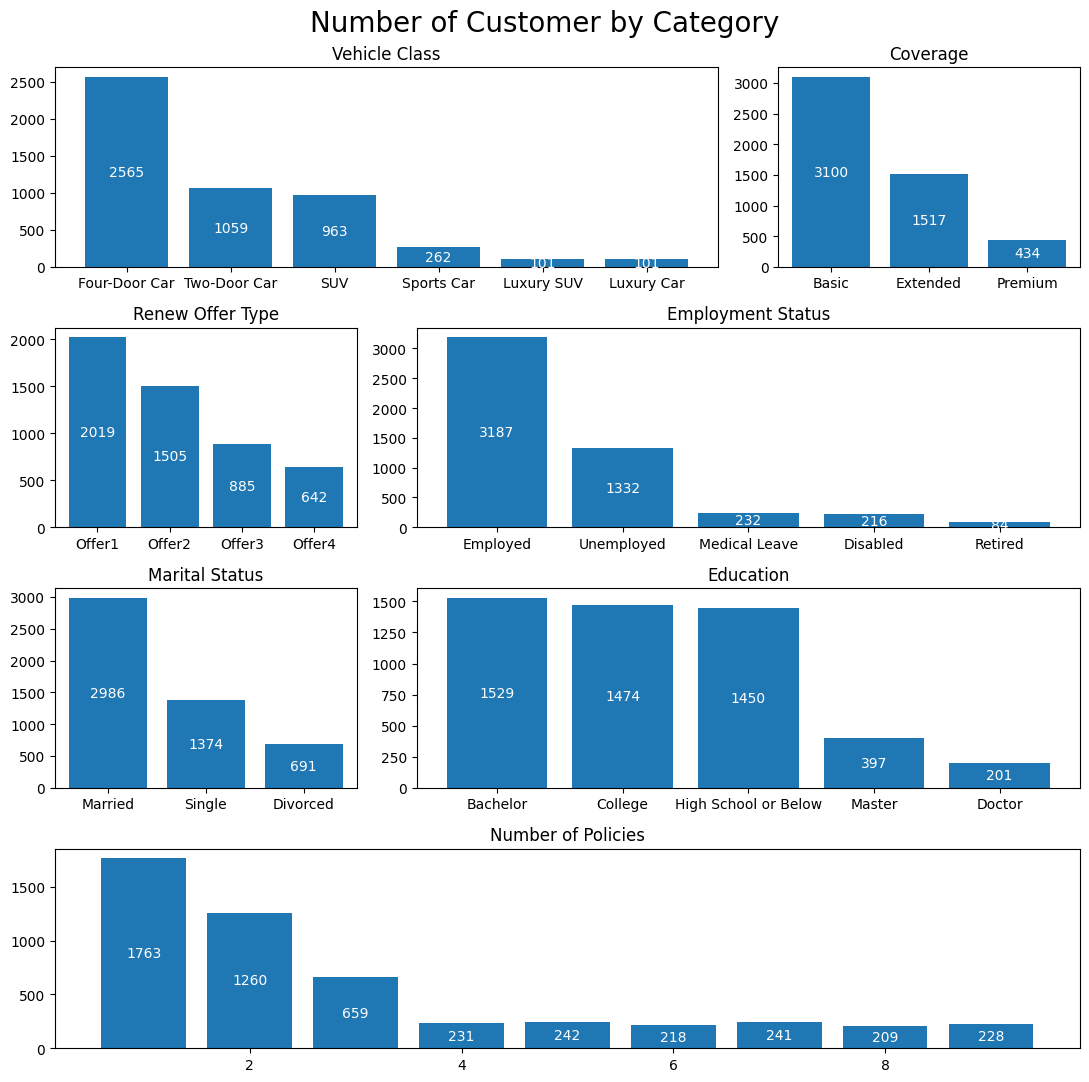

In [10]:
fig = plt.figure(figsize=(11, 11), facecolor = "none")
fig.suptitle("Number of Customer by Category",size = 20)
gs = fig.add_gridspec(4,3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1:])
ax7 = fig.add_subplot(gs[3, :])
sp = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]

counter = 0
for i in ctgk:
    bar = clv[i].value_counts()
    sp[counter].bar(bar.index, bar.values)
    counter += 1

for i in sp:
    i.bar_label(i.containers[0], label_type = "center", color = "white")

counter = 0
for i in ctgk:
    sp[counter].set_title(i)
    counter += 1

plt.tight_layout()
plt.show()

* Dapat dilihat bahwa jumlah kendaraan bertipe 4 pintu mendominasi tipe kendaraan para customer (2565 customer), dua kali lipat dari jumlah kendaraan bertipe lainnya. Hal dapat disebabkan karena kebanyakan kendaraan yang dijual di masyarakat adalah kendaraan dengan 4 pintu. Sementara itu, mobil 2 pintu dan SUV mengikuti dengan jumlah masing masing 1059 dan 963 customer. Kategori mobil mewah dan sport tidak banyak menyumbang customer, mungkin dikarenakan mobil-mobil tersebut langka masyarakat.
* Pengguna mayoritas memilih coverege basic (3100 customer). Diikuti oleh extended dan premium. Hal ini mungkin saja terjadi dikarenakan kebanyakan customer merupakan pengguna mobil biasa (4 pintu, 2 pintu, dan SUV). Customer mungkin cenderung memilih coverage yang murah.
* Penawaran pembaharuaan 1 paling tinggi dengan 2019 customer, diikuti oleh penewaran pembaharuan 2, 3, dan 4 dengan jumlah masing masing 1505, 885, dan 642 customer.
* Kebanyakan customer adalah orang yang bekerja, sebanyak 3187 customer. Hal ini terjadi mungkin karena orang yang bekerja memiliki penghasilan untuk memiliki mobil.
* Customer didominasi oleh orang yang menikah (2986 customer).
* Customer yang berpendidikan Bachelor, Collage, dan High School or Below memiliki jumlah yang mirip sekitar 1500-an customer. Jumlah customer bergelar Master dan Doctor memiliki jumlah yang sedikit. Hal ini bisa saja terjadi ketika jumlah orang yang berpendidikan Master dan Doctor sedikit di masyarakat.
* Customer yang memiliki satu polis berjumlah 1763 customer, diikuti oleh customer yang memiliki dua dan tiga polis (masing-masing 1260 dan 659 customer). Customer yang memiliki polis di atas 3, dari 4 sampai 9, memiliki jumlah yang mirip, sekitar 220-an customer.

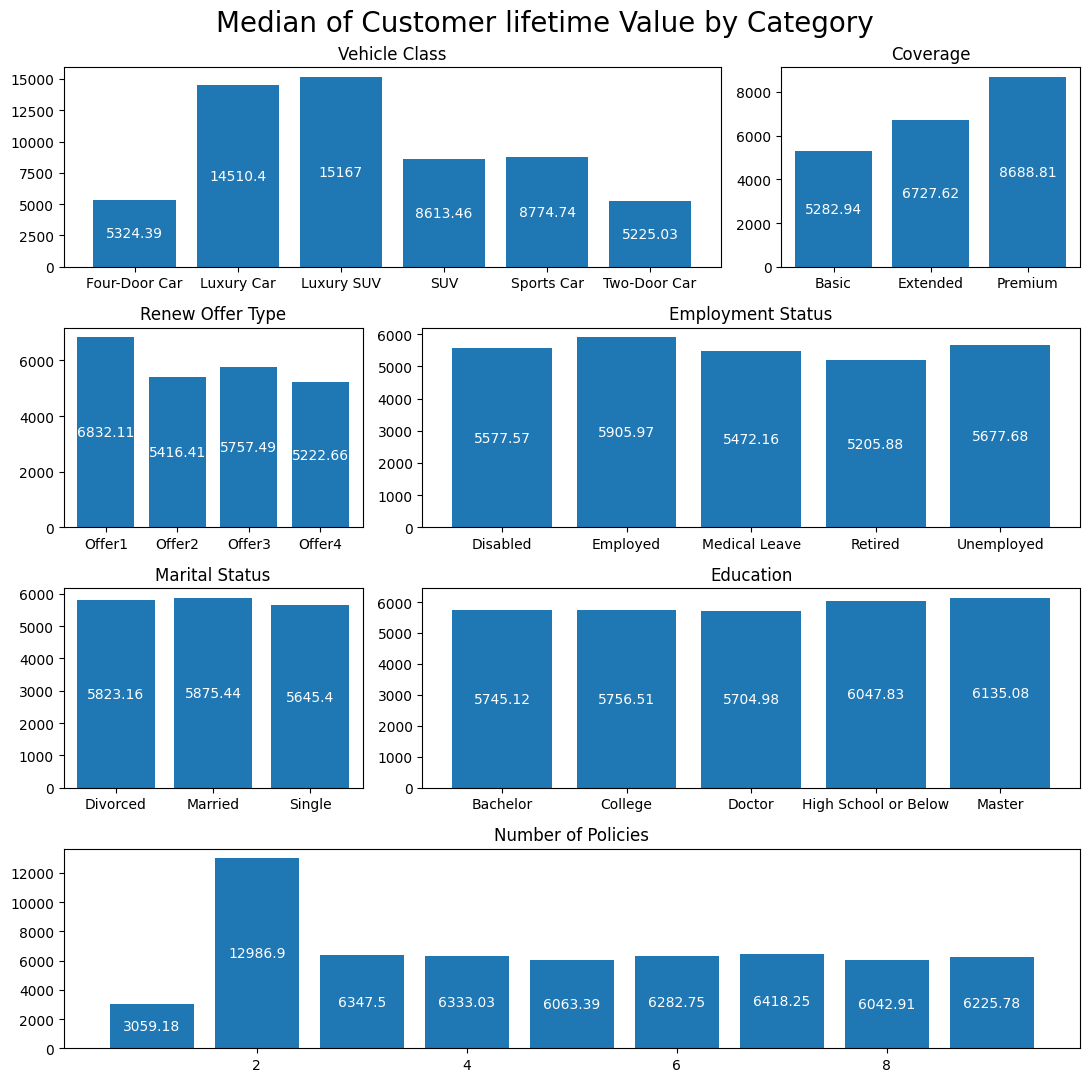

In [11]:
fig = plt.figure(figsize=(11, 11), facecolor = "none")
fig.suptitle("Median of Customer lifetime Value by Category",size = 20)
gs = fig.add_gridspec(4,3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1:])
ax7 = fig.add_subplot(gs[3, :])

sp = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
counter = 0
for i in ctgk:
    bar = clv.groupby(i)["Customer Lifetime Value"].median()
    sp[counter].bar(list(bar.index), list(bar.values))
    counter += 1

for i in sp:
    i.bar_label(i.containers[0], label_type = "center", color = "white")
    
counter = 0
for i in ctgk:
    sp[counter].set_title(i)
    counter += 1

plt.tight_layout()
plt.show()

* Tipe kendaraan mewah, luxury cars & luxury SUV, miliki median nilai CLV yang lebih tinggi dari yang dari tipe yang lainnya, sekitar 14500-an. Dikuti oleh SUV dan Sports Cars, sekitar 8600-an. Mobil dengan 4 pintu dan 2 pintu memiliki median nilai CLV sebesar 5000-an.

In [12]:
clv.groupby("Vehicle Class")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Vehicle Class,,
Four-Door Car,72.0,5324.387860
Luxury Car,193.0,14510.443760
Luxury SUV,199.0,15167.044020
SUV,116.0,8613.464001
Sports Car,116.0,8774.738289
Two-Door Car,71.0,5225.031430


* Basic Coverage mimiliki median CLV sebesar 5282.94. dibawah premium dan extended masing-masing sebesar 8688.81 dan 6727.62. Hal ini mungkin terjadi karena premi yang dibayarkan pada masing-masing tipe coverage berbeda, dengan basic coverage membayar paling rendah dan premium coverage paling tinggi.

In [13]:
clv.groupby("Coverage")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Coverage,,
Basic,70.0,5282.937237
Extended,92.0,6727.617003
Premium,114.0,8688.813000


* Tipe penawaran pembaharuan memberikan median nilai CLV yang cukup beragam walaupun dapat dilihat Offer 1 mimiliki nilai yang lebih tinggi dari tipe yang lainnya. Hal ini mungkin saja terjadi karena customer yang mengambil Offer 1 memiliki median premi bulanan lebih tinggi dari yang lainnya.

In [14]:
clv.groupby("Renew Offer Type")[["Monthly Premium Auto", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Customer Lifetime Value
Renew Offer Type,,
Offer1,90.0,6832.111972
Offer2,78.0,5416.413581
Offer3,79.0,5757.489397
Offer4,74.0,5222.656199


* Nilai median CLV ketika dipisahkan berdasarkan status pekerjaan memiliki nilai yang berbeda beda, hal ini mungkin dapat menunjukan bahwa status pekerjaan tidak berpengaruh terhadap CLV. Dapat dilihat dari nilai p value uji kruskal-wallis dibawah sebesar 0.0002 menunjukan bahwa nilai-nilai median itu tidak sama, akan tetapi perbedaan tidak besar. Hasil ini perlu dibuktikan oleh model.

In [15]:
from scipy.stats import kruskal

kruskal(clv[clv["Employment Status"] == "Employed"]["Customer Lifetime Value"],
        clv[clv["Employment Status"] == "Unemployed"]["Customer Lifetime Value"],
        clv[clv["Employment Status"] == "Disabled"]["Customer Lifetime Value"],
        clv[clv["Employment Status"] == "Retired"]["Customer Lifetime Value"],
        clv[clv["Employment Status"] == "Medical Leave"]["Customer Lifetime Value"])

KruskalResult(statistic=21.252979734232255, pvalue=0.00028211274463886543)

In [16]:
clv.groupby("Employment Status")[["Monthly Premium Auto", "Customer Lifetime Value"]].median().sort_values("Customer Lifetime Value")

,Monthly Premium Auto,Customer Lifetime Value
Employment Status,,
Retired,84.5,5205.882185
Medical Leave,81.0,5472.156984
Disabled,85.5,5577.569634
Unemployed,83.0,5677.679980
Employed,81.0,5905.971667


* Dapat dilihat bahwa nilai median CLV dari setiap kategori status pernikahan bernilai mirip, sebesar 5700-an. Hal ini juga ditunjukan oleh uji kruskal-wallis yang sebesar 0.096. Hal ini bisa menyebabkan feature ini tidak mempengaruhi model secara signifikan.

In [17]:
kruskal(clv[clv["Marital Status"] == "Divorced"]["Customer Lifetime Value"],
        clv[clv["Marital Status"] == "Married"]["Customer Lifetime Value"],
        clv[clv["Marital Status"] == "Single"]["Customer Lifetime Value"])

KruskalResult(statistic=4.672637507161582, pvalue=0.09668289750106525)

* Pada setiap kategori pada feature pendidikan, nilai median dari CLV tidak memiliki perbedaan yang jauh, sekitar 5900-an. Dengan nilai p-value uji kruskal wallis sebesar 0.091, maka terbukti bahwa feature ini mungkin tidak akan mempengaruhi model secara signifikan.

In [18]:
kruskal(clv[clv["Education"] == "High School or Below"]["Customer Lifetime Value"],
        clv[clv["Education"] == "College"]["Customer Lifetime Value"],
        clv[clv["Education"] == "Master"]["Customer Lifetime Value"],
        clv[clv["Education"] == "Bachelor"]["Customer Lifetime Value"],
        clv[clv["Education"] == "Doctor"]["Customer Lifetime Value"])

KruskalResult(statistic=8.011640082452045, pvalue=0.09115273275245567)

* Pada feature jumlah polis, customer dengan jumlah 1 polis memiliki nilai median yang paling kecil diantara yang lainnya, yaitu sebesar 3059.18. Sementara itu, Customer yang memiliki 2 polis mendapatkan median dari CLV-nya paling tinggi, sebesar 12986.9. Sisanya memiliki nilai yang mirip sebesar 6200-an. Hal ini dapat menyebabkan feature ini cukup berpengaruh pada model yang akan dibuat. Dengan melihat tabel dibawah tidak terdapat perbedaan signifikan pada nilai median feature premi bulanan, total klaim, dan pemasukan ketika dibagi berdasarkan jumlah polis. Hal ini didukung oleh uji kruskal walis pada feature-feature ini yang menghasilkan nilai diatas nilai signifikansi 5%. Dari hasil analis ini, kemungkinan besar feature ini mempengaruhi medel prediksi CLV yang akan dibuat.

In [19]:
clv.groupby("Number of Policies")[["Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]].median()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,,,,
1.0,80.0,374.400000,33947.0,3059.182181
2.0,82.0,365.080714,34043.5,12986.902435
3.0,84.0,377.917394,36881.0,6347.497519
4.0,84.0,391.039166,33137.0,6333.030812
5.0,78.5,388.011278,36650.0,6063.392804
6.0,81.5,345.600000,40921.5,6282.750917
7.0,83.0,398.400000,30735.0,6418.248710
8.0,81.0,409.868003,31756.0,6042.911900
9.0,80.5,369.942675,32528.0,6225.781965


In [20]:
a = ["Monthly Premium Auto", "Total Claim Amount", "Income"]
stats, p_val = kruskal(clv[clv["Number of Policies"] == 1.0][a],
                       clv[clv["Number of Policies"] == 2.0][a],
                       clv[clv["Number of Policies"] == 3.0][a],
                       clv[clv["Number of Policies"] == 4.0][a],
                       clv[clv["Number of Policies"] == 5.0][a],
                       clv[clv["Number of Policies"] == 6.0][a],
                       clv[clv["Number of Policies"] == 7.0][a],
                       clv[clv["Number of Policies"] == 8.0][a],
                       clv[clv["Number of Policies"] == 9.0][a])
print("Kruskal Wallis Test Result")
display(pd.Series(p_val, index = a))

Kruskal Wallis Test Result


Monthly Premium Auto    0.707694
Total Claim Amount      0.514843
Income                  0.073717
dtype: float64

### 2.2.4. Numerical Features

In [21]:
clv[nmrk].describe()

,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


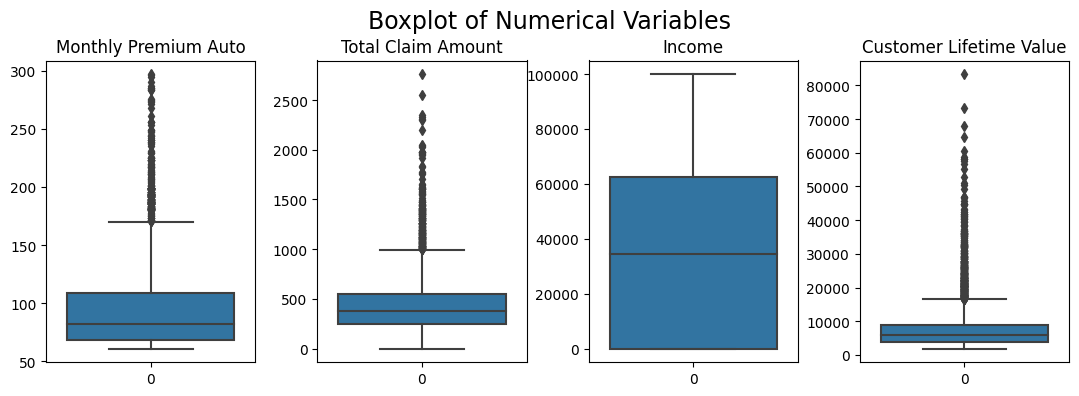

In [22]:
fig, axs =  plt.subplots(1, 4, figsize=(11, 4), facecolor = "none")

fig.suptitle("Boxplot of Numerical Variables", size = 17)
fig.tight_layout()

pos = 0
for i in clv[nmrk].columns:
    sns.boxplot(clv[i], ax = axs[pos])
    axs[pos].set_title(i)
    pos +=1

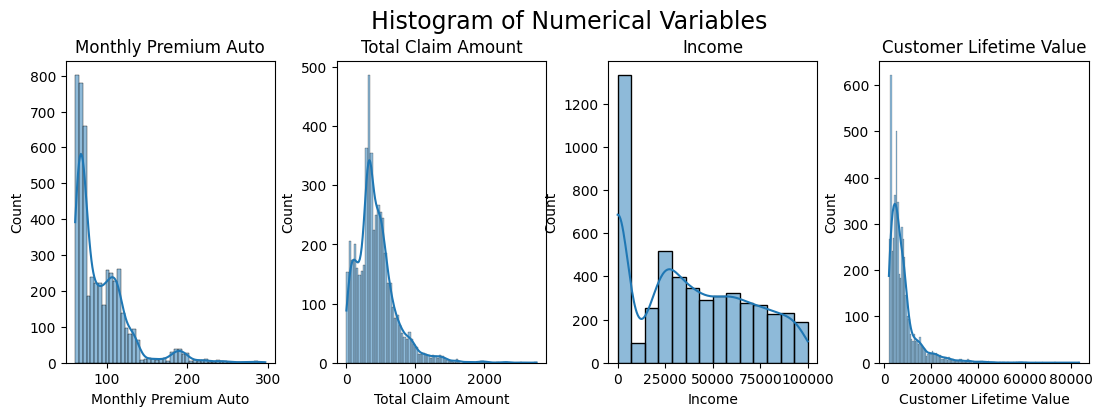

In [23]:
fig, axs =  plt.subplots(1, 4, figsize=(11, 4), facecolor = "none")

fig.suptitle("Histogram of Numerical Variables", size = 17)
fig.tight_layout()

pos = 0
for i in clv[nmrk].columns:
    sns.histplot(clv[i], ax = axs[pos], kde = True)
    axs[pos].set_title(i)
    pos +=1

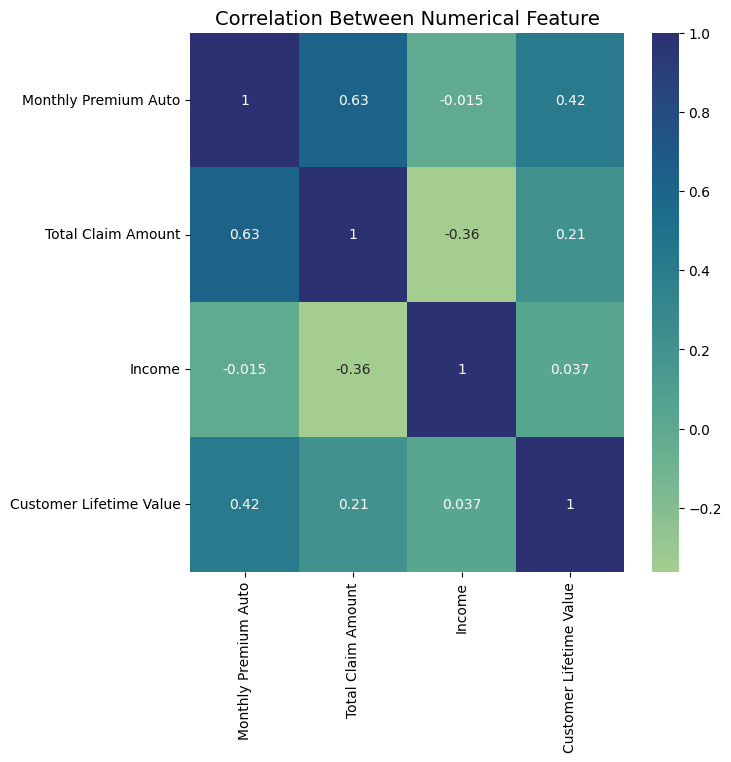

In [24]:
plt.figure(figsize=(7, 7), facecolor = "none")
sns.heatmap(clv[nmrk].corr(), annot = True, cmap = "crest")

plt.title("Correlation Between Numerical Feature", size = 14)
plt.show()

* Variabel Monthly Premium Auto tidak terdistribusi normal. Nilai median dari variabel premi bulanan adalah 82 Dollar dengan nilai maksimum dan minimum masing-masing sebesar 61 Dollar dan 297 Dollar.
* Variabel Total Claim Amount juga tidak terdistribusi normal. Nilai median dari variabel ini adalah 374.4 Dollar dengan nilai maksimum dan minimum masing-masing sebesar 0.423310 Dollar dan 2759.794354 Dollar.
* Variabel Income, sama seperti Monthly Premium Auto dan Total Claim Amount, juga tidak terdistribusi normal. Nilai median variabel pemasukan customer memiliki nilai sebesar 34322 Dollar dengan nilai maksimum dan minimum 0 Dollar dan 99934 Dollar.
* Dilihat dari visualisasi korelasi, feature yang memiliki nilai korelasi paling tinggi dengan  adalah Monthly Premium Auto (0.42). Walaupun demikian Total Claim Amount memiliki korelasi cukup tinggi dengan Monthly Premium Auto (0.63). Variabel Income memiliki korelasi yang cukup rendah jika dibandingkan dengan Customer Lifetime Value.
* Dapat dilihat dari statistik dekriptif, boxplot, dan histogram feature dengan tipe data numerik, hanya income yang tidak memiliki outliers. Outlier-outlier ini nantinya dapat mempengaruhi performa dari model yang akan dibuat. Untuk itu perlu adanya analisis untuk mengetahui tindakan yang diperlukan untuk data outliers.

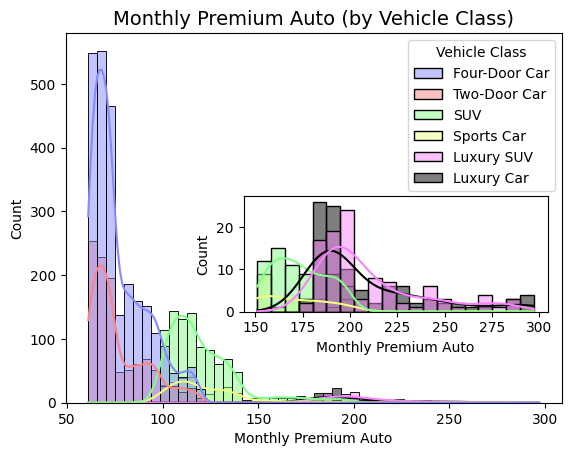

In [25]:
# Mothly Premium Auto
fig, ax1 = plt.subplots(facecolor = "none")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = clv, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = clv[clv["Monthly Premium Auto"] > 150], bins = 20, x = "Monthly Premium Auto", hue = "Vehicle Class", kde = True, palette = ["#F884FC", "black", "#84FC89", "#F1FC84"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Monthly Premium Auto (by Vehicle Class)", size = 14)
plt.show()

In [26]:
clv.groupby("Vehicle Class")["Monthly Premium Auto"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Two-Door Car,1059.0,76.674221,14.420455,61.0,66.0,71.0,86.0,119.0
Four-Door Car,2565.0,77.020663,14.142962,61.0,66.0,72.0,86.0,119.0
SUV,963.0,120.860852,18.966141,100.0,108.0,116.0,129.0,199.0
Sports Car,262.0,122.190840,19.335559,100.0,109.0,116.0,132.0,199.0
Luxury Car,101.0,207.792079,30.933256,180.0,187.0,193.0,223.0,297.0
Luxury SUV,101.0,209.386139,27.256181,180.0,192.0,199.0,219.0,287.0


In [27]:
def outliers_check(dataset, feature):
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    
    iqr = q3 - q1
    
    global upper_limit, lower_limit
    
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    print(f"Upper Limit for {feature} variable is {upper_limit} and Lower Limit is {lower_limit}")

In [28]:
outliers_check(clv, "Monthly Premium Auto")

Upper Limit for Monthly Premium Auto variable is 170.5 and Lower Limit is 6.5


Menghapus data outliers pada variabel Monthly Premium auto, diamana batas atas yang didapatkan dari perhitungan IQR adalah 170.5 Dollar, tidak bijaksana untuk dilakukan. Ketika data dengan nilai Monthly Premium Auto diatas nilai batas atas, maka 2 buah kelas dari variabel Vehivle Class, Luxury Car & Luxury SUV akan hilang. Oleh karena itu, Penghapusan Data Outliers berdasarkan variabel monthly Premium Auto tidak akan dilakukan.

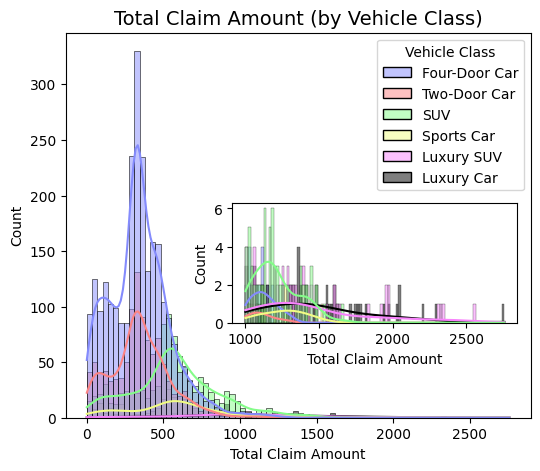

In [29]:
# Total Claim Amount
fig, ax1 = plt.subplots(figsize = (6,5), facecolor = "none")

left, bottom, width, height = [0.403, 0.3, 0.475, 0.24]
ax2 = fig.add_axes([left, bottom, width, height])

sns.histplot(data = clv, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#848BFC", "#FC8484", "#84FC89", "#F1FC84", "#F884FC", "black"], ax = ax1)
sns.histplot(data = clv[clv["Total Claim Amount"] > 1000], bins = 100, x = "Total Claim Amount", hue = "Vehicle Class", kde = True, palette = ["#84FC89", "#F884FC", "black", "#F1FC84", "#848BFC", "#FC8484"], ax = ax2)
ax2.get_legend().remove()

ax1.set_title("Total Claim Amount (by Vehicle Class)", size = 14)
plt.show()

In [30]:
clv.groupby("Vehicle Class")["Total Claim Amount"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Two-Door Car,1059.0,347.867548,193.766877,1.332349,230.655925,336.000000,456.488343,1261.943541
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
Luxury Car,101.0,1103.927488,518.906203,32.874675,873.600000,1008.569798,1396.702365,2759.794354


In [31]:
outliers_check(clv, "Total Claim Amount")

Upper Limit for Total Claim Amount variable is 992.6433477500001 and Lower Limit is -192.74392225000005


Ketika data outilers pada variabel Total Claim Amount dihapus (dengan nilai batas atas = 992.6433477500001 Dollar), tidak ada kelas pada variabel kategorik yang terhapus. Akan tetapi, data pada kelas Luxury Car dan Luxury SUV, dengan nilai median Total Claim Amount masing-masing kelas 998.400000 Dollar dan 1008.569798 Dollar, lebih dari setengah data pada kelas tersebut dihapus. Untuk itu, sebaiknya tindakan penghapusan data outliers pada variabel Total Claim Amount jangan dilakukan, kecuali jika hasil dari model kurang memuaskan.

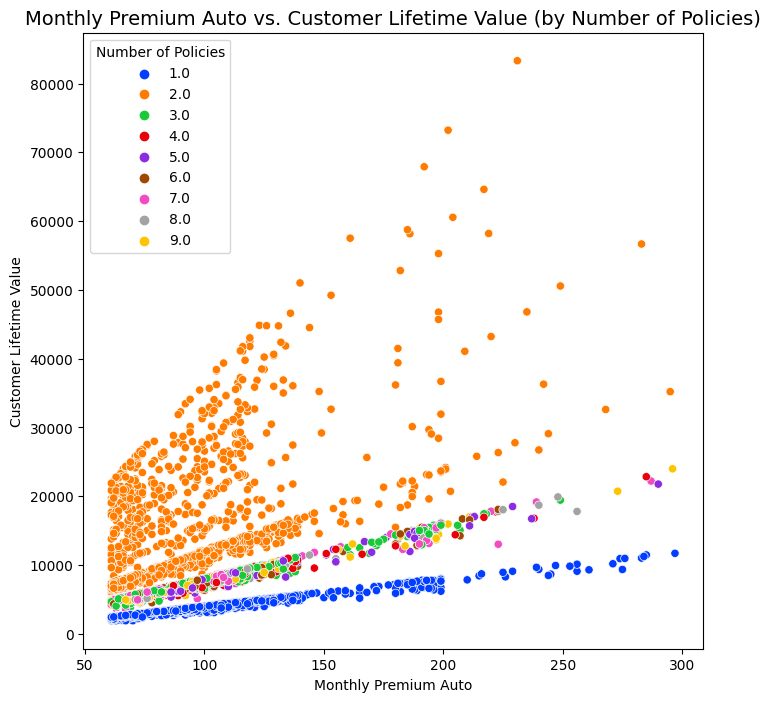

In [32]:
# Customer lifetime Value
plt.figure(figsize = (8,8), facecolor = "none")
sns.scatterplot(data = clv, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "bright")

plt.title("Monthly Premium Auto vs. Customer Lifetime Value (by Number of Policies)", size = 14)
plt.show()

In [33]:
outliers_check(clv, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


Hal yang menarik terjadi ketika variabel Customer Lifetime Value dibandingkan dengan Monthly Premium Auto dan Number of Policies. Dapat dilihat semakin besar nilai Monthly Premium Auto semakin besar juga nilai Customer Lifetime Valuenya pada Number of Policies yang sama. Dapat dilihat kelas jumlah polis 1 berada di bawah dengan warna titik biru, diikuti oleh data dengan jumlah polis yang lebih dari 2. Jumlah polis 2 adalah data dengan nilai Customer Lifetime value tertinggi diantara jumlah polis lainnya. Hal ini sejalan dengan bagian sebelumnya yang menyebutkan bahwa nilai median CLV dari kelas jumlah polis 2 lebih tinggi dari kelas yang lainnya. Perhatikan bahwa terdapat banyak contextual outliers pada data dengan jumlah polis 2. Dengan menghapus outliers pada kolom tersebut mungkin dapat meningkatkan performa model yang akan dibuat.

### 2.2.5. Outliers Removal from Dataset

In [34]:
outliers_check(clv, "Customer Lifetime Value")

Upper Limit for Customer Lifetime Value variable is 16624.75007525 and Lower Limit is -3631.744438749999


In [35]:
clv[clv["Customer Lifetime Value"] > upper_limit]["Customer Lifetime Value"].count()

449

Terdapat 449 outliers pada kolom Customer Lifetime Value.

In [36]:
clv_new = clv[clv["Customer Lifetime Value"] <= upper_limit].copy()

In [37]:
feature = []
n_data = []
n_feature = []
s_feature = []

for i in clv_new.columns:
    feature.append(i)
    n_data.append(clv_new[i].count())
    n_feature.append(clv_new[i].nunique())
    s_feature.append(list(clv_new[i].unique())[:9])

pd.set_option("display.max_colwidth", None)  
pd.DataFrame({"Number of Datas" : n_data, "Number of Types" : n_feature, "Samples of Types" : s_feature}, index = clv.columns)

,Number of Datas,Number of Types,Samples of Types
Vehicle Class,4602,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
Coverage,4602,3,"[Extended, Basic, Premium]"
Renew Offer Type,4602,4,"[Offer1, Offer3, Offer2, Offer4]"
Employment Status,4602,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
Marital Status,4602,3,"[Divorced, Married, Single]"
Education,4602,5,"[High School or Below, College, Master, Bachelor, Doctor]"
Number of Policies,4602,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
Monthly Premium Auto,4602,160,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0]"
Total Claim Amount,4602,2979,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772]"
Income,4602,3309,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0]"


Tidak terdapat kelas yang berkurang pada variabel kategorik setelah data outliers pada variabel dihapus.

In [38]:
print("Statistik Deskriptif Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(clv[nmrk].describe())
print("Statistik Deskriptif Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(clv_new[nmrk].describe())

Statistik Deskriptif Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


Statistik Deskriptif Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4602.000000,4602.000000,4602.000000,4602.000000
mean,90.584528,420.104245,37587.835289,6325.184168
std,30.844160,279.398375,30665.844042,3320.547103
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.526302,0.000000,3708.569393
50%,80.000000,369.868595,34140.500000,5505.112198
75%,107.000000,541.740429,62212.250000,8169.469198
max,297.000000,2759.794354,99934.000000,16589.712370


Tidak ada perubahan range dari varible numerik untuk independen variabel setelah data outliers variabel Customer Lifetime Value dihapus.

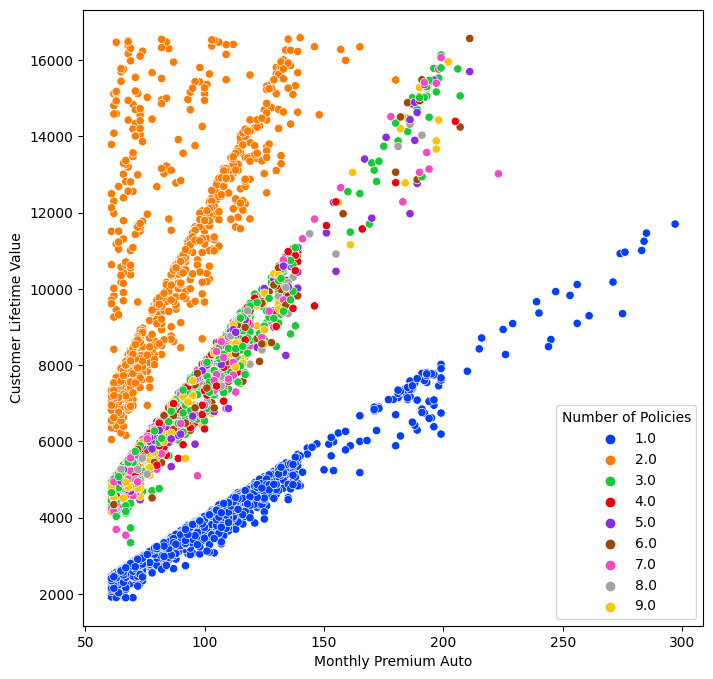

In [39]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = clv_new, 
                y = "Customer Lifetime Value", x = "Monthly Premium Auto", 
                hue = "Number of Policies",
                palette = "bright")

plt.show()

### 2.2.6. Insight Summary from Explanatory Data Analysis

* Kemungkinan feature yang mempengaruhi besarnya nilai Customer Lifetime Value adalah feature Number of Policies dan Monthly Premium Auto.
* Feature Employment Status, Marital Status, dan Education tidak memberikan perbedaan nilai median CLV yang signifikan sehingga mungkin tidak akan terlalu mempengaruhi model yang akan dibuat.
* Feature Vehicle Class, Coverage, dan Renew Offer Type memberikan perbedaan terhadap median, akan tetapi perbedaan tersebut mungkin saja dipengaruhi Monthly Premium Auto, sehingga mungkin juga kurang berpengaruh.
* Feature dengan tipe data numerikal, selain feature Monthly Premium Auto, memberikan nilai uji korelasi yang rendah (dibawah 0.3) yang mungkin saja mengakibatkan featur-feature tersebut tidak berpengaruh.

# 3 Modeling

## 3.1. Data Spliting

Data set akan dibagi menjadi dua bagian, yaitu data train dan data set. Data train adalah data yang nantinya digunakan untuk melatih model machine learning. Data test digunakan untuk menguji apakah model yang sudah dibuat mampu memberikan nilai prediksi yang memuaskan. Perbandingan jumlah data train dan data test adalah 70% berbanding 30%.

In [40]:
# Memisahkan Target dengan Feature
x = clv_new.drop("Customer Lifetime Value", axis = 1) # Feature
y = clv_new["Customer Lifetime Value"]                # Target : Customer Lifetime Value

In [41]:
# Memisahkan antara train set dan test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2020) # parameter random_state digunakan agar pembagian data train dan test secara
                                                                               # acak akan mengasilkan hasil yang sama setiap kali dijalankan

## 3.2 Data Preprocessing

Dataset yang akan digunakan sebagai sumber latihan model machine learning tidak dapat lasung digunakan karena pemodelan yang akan digunakan tidak dapat menerima inputan selain data numerik. Untuk itu perlu adanya transformasi kolom dengan cara encoding. Pada feature dengan data nominal seperti Vehicle Class, Employment Status, dan `Marital Status`, onehot encoding dapat diterapkan (binary encoding tidak digunakan karena jumlah kelas tidak banyak). Feature Coverage, Renew Offer Type, dan Education akan di-encode menggunakan ordinal encoder karena kelas pada feature-feature tersebut memiliki rangking.

In [42]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Mapping digunakan untuk ordinal encoder
coverage_mapping = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
rot_mapping = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
education_mapping = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "Employment Status", "Marital Status"]), # Onehot encoder untuk data nominal
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = coverage_mapping), ["Coverage"]),                   # Ordinal encoder untuk data ordinal
    ("rot_ordinal", ce.OrdinalEncoder(mapping = rot_mapping), ["Renew Offer Type"]),                     # ---------------//-----------------
    ("education_ordinal", ce.OrdinalEncoder(mapping = education_mapping), ["Education"])                 # ---------------//-----------------
], remainder = "passthrough")

In [43]:
# transformer.fit_transform(x) # Uji apakah transformer bisa dijalankan

In [44]:
# pd.DataFrame(transformer.fit_transform(x))

## 3.3. Benchmark Model

Pada saat melakukan benchmark model, beberapa model akan melakukan cross validasi pada data train. Cross validasi dilakaukan dengan membagi data train menjadi beberapa bagian, pada kasus pembentukan model dataset ini adalah 5. Empat data diambil untuk di train menggunakan model lalu hasilnya dihitung menggunakan data sisnya, yang disebut data validasi. Pengulang dilakukan sehingga semua bagian data pernah menjadi data validasi. Nilai rata-ratanya dan standar deviasi akan dihitung untuk menentukan apakah model sudah cocok dengan dataset.

In [45]:
# Import model yang akan digunakan, pada kasus ini adalah Linear Regression, Lasso, Ridge, KNN Regression, Decision Tree Regression, Random Forest Regression, dan XG-Boost.

from sklearn.linear_model import LinearRegression, Lasso, Ridge # Import Library untuk model regressi linear, Lasso, dan Ridge
from sklearn.neighbors import KNeighborsRegressor               # Import Library untuk model k-nearest neighbors regressor
from sklearn.tree import DecisionTreeRegressor                  # Import Library untuk model dicision tree regressor
from sklearn.ensemble import RandomForestRegressor              # Import Library untuk model random forest regressor
from xgboost.sklearn import XGBRegressor                        # Import Library untuk model xb-boost regressor

lr = LinearRegression()
lasso = Lasso(alpha = 0.001)
rid = Ridge(alpha = 0.001)
knn = KNeighborsRegressor(n_neighbors = 15)                     # Pada KNN Regressor, akan digunakan MinMax scaler untuk meningkatkan performa model
knn_scaler = ColumnTransformer([
    ("MinMax", MinMaxScaler(), [15, 16, 17])                    # Perlu dicatat nomer 15, 16, dan 17 adalah feature Monthly Premium Auto, Total Claim Amount, dan
], remainder = "passthrough")                                   # Income yang sudah melalui Column Transformer sebelumnya
knn_plus = Pipeline([
    ("scaler", knn_scaler),
    ("knn", knn)
])
dt = DecisionTreeRegressor(max_depth = 3, random_state = 2020)                        # Parameter max_depth digunakan untuk membatasi kedalaman pohon ggar tidak overfit
rf = RandomForestRegressor(max_depth = 3, random_state = 2020, max_features = "log2") # Parameter max_faeture digianakan agar pohon-pohon yang dihasilkan beragam.
xgb = XGBRegressor(max_depth = 3, random_state = 2020)

In [46]:
# Melakukan cross validasi pada model-model yang ditentukan
from sklearn.model_selection import KFold, GridSearchCV                # Import KFold untuk membagi data train dan GridSearchCV untuk melakukan cross validasi terhadap beberapa contoh model

hyperparam_space = {"model" : [lr, lasso, rid, knn_plus, dt, rf, xgb]} # Model-model yang akan dipilih sebagai 

estimator = Pipeline([                                                 # Pipeline digunakan agar preproses dan pemodelan dilakukan dalam satu tahapan seri
    ("preprocess", transformer),
    ("model", lr)
])

cv = KFold(n_splits = 5,shuffle = True, random_state = 2020)           # Parameter n_splits menentukan seberapa banyak data dibagi untuk cross validasi, sementara itu suffle & random_state diatur agar
                                                                       # setiap perintah cross validasi dijalankan akan menghasilkan pembagian data yang sama
grid = GridSearchCV(estimator,
                    param_grid = hyperparam_space,
                    cv = cv,
                    scoring = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "neg_mean_absolute_percentage_error"], # Memilin metric yang dihitung pada tiap model
                    n_jobs = -1, refit = "neg_root_mean_squared_error")                                                         # Memilih metric yang digunakan sebagai best_estimator,
                                                                                                                                # pada kasus ini adalah RMSE
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'mapping': {None: 0,
                                                                                                              'Basic': 1,
                                                                                                              'E...
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=3, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n_estimators=100, n_jobs=None,
                                                num_parallel_tree=None,
                                                predictor=None,
                                                random_state=2020, ...)]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [47]:
# Menampilkan score cross validasi
cross_val_columns = ["Rank (based on RSME)", "Model", "Mean RMSE", "STD RMSE", "Mean MAE", "STD MAE", "Mean MAPE", "STD MAPE"]

cros_val_result = pd.DataFrame(grid.cv_results_)[["rank_test_neg_root_mean_squared_error", "param_model", "mean_test_neg_root_mean_squared_error", 
                                                  "std_test_neg_root_mean_squared_error", "mean_test_neg_mean_absolute_error", "std_test_neg_mean_absolute_error",
                                                  "mean_test_neg_mean_absolute_percentage_error", "std_test_neg_mean_absolute_percentage_error"]]
cros_val_result.columns = cross_val_columns
cros_val_result.set_index("Rank (based on RSME)", inplace = True)
cros_val_result.sort_index()

,Model,Mean RMSE,STD RMSE,Mean MAE,STD MAE,Mean MAPE,STD MAPE
Rank (based on RSME),,,,,,,
1,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=3, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=2020, ...)",-932.509912,59.509073,-452.243338,17.774570,-0.065858,0.002535
2,"DecisionTreeRegressor(max_depth=3, random_state=2020)",-1377.547308,74.246974,-858.018350,42.633661,-0.120163,0.004188
3,"(ColumnTransformer(remainder='passthrough',\n transformers=[('MinMax', MinMaxScaler(), [15, 16, 17])]), KNeighborsRegressor(n_neighbors=15))",-2040.751654,85.041960,-1239.449574,26.610029,-0.179091,0.002802
4,"RandomForestRegressor(max_depth=3, max_features='log2', random_state=2020)",-2189.335233,71.969480,-1595.361351,49.416598,-0.302177,0.006587
5,Lasso(alpha=0.001),-2759.094408,111.095715,-2069.750742,71.342632,-0.377266,0.009030
6,Ridge(alpha=0.001),-2759.095285,111.096029,-2069.751507,71.341969,-0.377266,0.009030
7,LinearRegression(),-2759.095507,111.096159,-2069.751629,71.341707,-0.377266,0.009030


Dapat dilihat, model XG-Boost memberikan nilai rata-rata RMSE, MAE, dan MAPE yang paling rendah dari semua model. Oleh karena itu, model yang terpilih sebagai model prediksi adalah XG-Boost

## 3.4. Prediction with Test Set

Model XG-Boost adalah model yang dipilih untuk model estimasi CLV. XG-Boost sendiri adalah metode ensamble yang berbasis pohon keputusan. Cara kerja dari XG-Boost adalah dengan membuat beberapa pohon keputusan, tetapi pohon keputusan bergantung pada hasil pada pohon keputusan sebelumnya. Awalnya, sebuah pohon keputusan dibuat terlebih dahulu. Dari pohon keputusan pertama terdapat residual yang nantinya dijadikan sebagai target pohon keputusan berikutnya. Hasil dari prediksi residual pohon keputusan ini nantinya di scaling berdasarkan learning rate yang sudah ditentukan dan dijumlahkan dengan hasil prediksi pohon pertama yang nantinya akan menghasilkan prediksi pohon kedua. Proses terus dijalankan sampai jumlah pohon sesuai dengan nilai yang ditetapkan. Seluruh nilai pada setiap tree nantinya akan dirata-ratakan untuk mendapatkan hasil prediksi dari model.

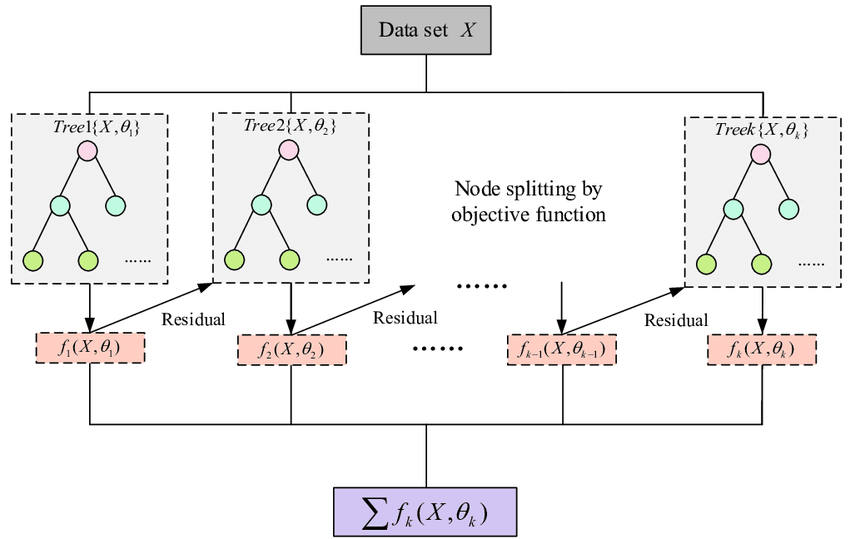
sumber : https://www.researchgate.net/publication/345327934_Degradation_state_recognition_of_piston_pump_based_on_ICEEMDAN_and_XGBoost

In [48]:
# Melakukan fit terhadap keseluruhan data train, dan memprediksi 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

xgb = XGBRegressor(max_depth = 3, random_state = 2020)
estimator = Pipeline([
    ("transformer", transformer),
    ("model", xgb)
])

estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)

def regression_score(model_name, test, pred):
    rmse = np.sqrt(mean_squared_error(test, pred))
    mae = mean_absolute_error(test, pred)
    mape = mean_absolute_percentage_error(test, pred)
    return pd.DataFrame({"RMSE" : rmse, "MAE" : mae, "MAPE" : mape}, index = [model_name])

regression_score("XG_Boost", y_test, y_pred)

,RMSE,MAE,MAPE
XG_Boost,930.950442,436.401469,0.062323


Dari hasil prediksi menggunakan data test, didapatkan nilai RMSE sebesar 930.950442 Dollar, sedangkan untuk nilai MAPE didaptakan sebesar 6.2%. Hasil yang cukup memuaskan, akan tetapi ada potensi hasil menjadi lebih baik ketika menggunakan Hyperparamater Tuning.

## 3.5. Hyperparameter Tuning

In [49]:
# Gunakan fungsi get_params untuk melihat parameter didalam pipeline yang bisa di tuning.
# estimator.get_params()

ada beberapa paramater yang dapat diatur pada model XG-Boost pada saat melakukan Hyperparameter Tuning. Parameter tersebut diantaranya adalah :

|Parameter|Fungsi|
|--|--|
|learning_rate|Besarnya beban yang ditambahkan setiap pohon keputusan baru dibuat|
|n_estimators|Banyak pohon yang akan dibuat|
|max_depth|Nilai maksimum kedalam pohon keputusan|
|gamma|min impurity decrease, semakin besar nilainya, semakin konservatif/simpel modelnya|

In [50]:
# Memasukan parameter-parameter yang digunakan untuk Hyperparameter Tuning
hyperparam_space = [
    {"model__learning_rate" : [1, 0.1, 0.05, 0.005],
     "model__n_estimators" : [20,200,400,4000],
     "model__max_depth" : [3,4,5,6],
     "model__gamma" : [0,1,2,3]}
]

In [51]:
# Membuat grid search untuk mendapatkan nilai error paling rendah
grid = GridSearchCV(estimator,
                    param_grid = hyperparam_space,
                    cv = cv,
                    scoring = "neg_root_mean_squared_error",
                    n_jobs = -1)

In [52]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Employment '
                                                                          'Status',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'mapping': {None: 0,
                                                                                                              'Basic': 1,
                                                                                                              '...
                                                     max_depth=3, max_leaves=0,
                                                     min_child_weight=1,
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100, n_jobs=0,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=2020, ...))]),
             n_jobs=-1,
             param_grid=[{'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [1, 0.1, 0.05, 0.005],
                          'model__max_depth': [3, 4, 5, 6],
                          'model__n_estimators': [20, 200, 400, 4000]}],
             scoring='neg_root_mean_squared_error')

In [53]:
pd.DataFrame(grid.cv_results_)[["params", "mean_fit_time", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score").head()

,params,mean_fit_time,mean_test_score,std_test_score,rank_test_score
229,"{'model__gamma': 3, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.557253,-899.897316,67.598195,1
37,"{'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.578929,-899.897316,67.598195,1
165,"{'model__gamma': 2, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.629776,-899.897316,67.598195,1
101,"{'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 200}",0.596212,-899.897316,67.598195,1
109,"{'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 200}",1.073657,-907.690220,85.030900,5


Dari hasil hyperparameter tuning, kita mendapatkan hasil terbaik dari model XG_Boost dengan hasil sebagai berikut :
|Parametr|Nilai|
|--|--|
|learning_rate|0.05|
|n_estimator|200|
|max_depth|4|
|gamma|3|

## 3.6. Prediction with Tuned Model

Lakukan perbandingan antara model XG-Boost awal dan model yang sudah dilakukan Hyperparameter tuning.

In [54]:
# Fit model yang sudah dilakukan hyperparameter tuning dengan keseluruhan data test untuk memprediksi data test
tuned_estimator = grid.best_estimator_
tuned_estimator.fit(x_train, y_train)
y_pred_tuned = tuned_estimator.predict(x_test)
display(regression_score("Before Tuning", y_test, y_pred), regression_score("After Tuning", y_test, y_pred_tuned))

,RMSE,MAE,MAPE
Before Tuning,930.950442,436.401469,0.062323


,RMSE,MAE,MAPE
After Tuning,908.985104,374.971422,0.048485


Terjadi penurunan error pada RSME sebesar 22 Dollar. Penurunan error cukup besar terjadi di MAE dan MAPE, dimana MAE berkurang sebesar 61 dollar dan MAPE berkurang 1.38%. Hasil tuning bisa dianggap cukup memuaskan. Model setelah tuning akan diambil menjadi model akhir yang akan dideploy.

## 3.7. Model Explanation

In [55]:
# Mendapqtkan nama kolom dari tahapan preprocessing sebelumnya
features = (list(tuned_estimator[0].transformers_[0][1].get_feature_names_out()) +
            tuned_estimator[0].transformers_[1][2] +
            tuned_estimator[0].transformers_[2][2] +
            tuned_estimator[0].transformers_[3][2] +
            list(x_train.columns[tuned_estimator[0].transformers_[4][2]]))

<Figure size 800x800 with 0 Axes>

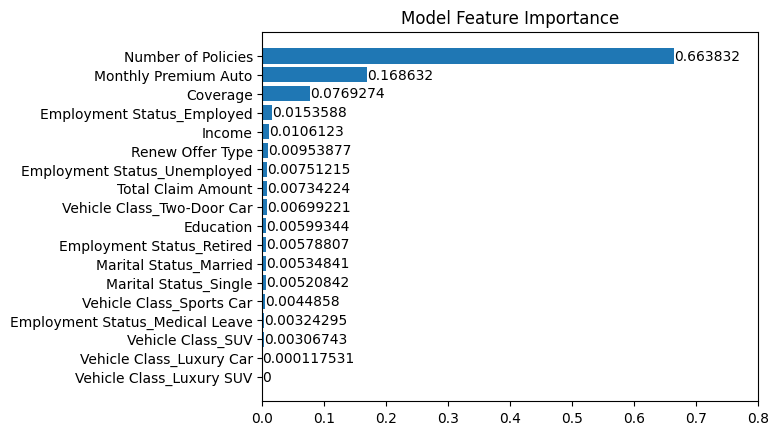

In [56]:
feature_importance = pd.DataFrame({"Importances" : tuned_estimator[1].feature_importances_}, index = features).sort_values("Importances")

plt.figure(figsize = (8,8))
fig, ax = plt.subplots(facecolor = "none")
bars = ax.barh(feature_importance.index, feature_importance["Importances"].values)
ax.set_xlim([0,0.8])
ax.bar_label(bars)
plt.title("Model Feature Importance")

plt.show()

Dari Barchart Model Feature Importance di atas, didapatkan feature yang paling mempengaruhi model adalah Number of Policies. Feature yang paling berpengaruh selajutnya adalah Monthly premium Auto. feature Coverage berada di peringkat ketiga. Feature lainya berpengaruh, akan tetapi tidak sebesar ketiga feature sebelumnya.

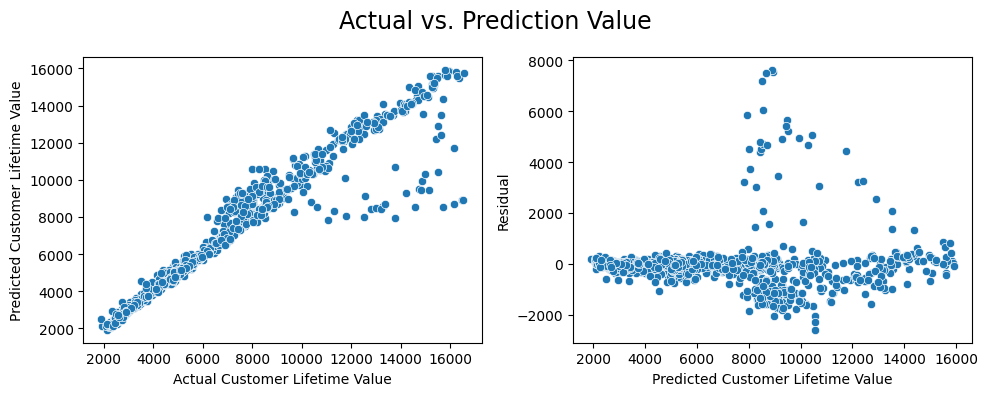

In [57]:
fig, axs =  plt.subplots(1, 2, figsize=(10, 4), facecolor = "none")

sns.scatterplot(y = y_pred_tuned, x = y_test, ax = axs[0])
axs[0].set_xlabel("Actual Customer Lifetime Value")
axs[0].set_ylabel("Predicted Customer Lifetime Value")

sns.scatterplot(x = y_pred_tuned, y = y_test - y_pred_tuned, ax = axs[1])
axs[1].set_xlabel("Predicted Customer Lifetime Value")
axs[1].set_ylabel("Residual")

fig.suptitle("Actual vs. Prediction Value", size = 17)
fig.tight_layout()

Dari grafik Actual vs. Prediction Value, didapatkan bahwa prediksi yang diberikan sudah cukup memberikan hasil yang baik pada prediksi Customer Lifetime Value dengan nilai yang rendah. Akan tetapi, ketika prediksi customer lifettime valuenya tinggi (diatas 80000). Didapatkan beberapa data set memberikan hasil yang kurang baik. Hal ini menandakan model kurang mampu menebak value dengan hasil yang tinggi. Terlihat pada grafik diatas beberapa data yang memiliki nilai CLV aktual yang tinggi diprediksi memiliki prediksi CLV diantara 8000 dan 10000. Ini menandakan adanya bias pada model yang telah dibuat.

Perlu dicatat juga, kebanyakan data yang memiliki residual yang tinggi mengalami undervalue, dimana data prediksi memprediksi value yang lebih kecil dari data aslinya. Ini menandakan jika perusahaan ingin mengetahui mana customer yang memiliki CLV yang rendah, model ini cukup reliable.

# 4. Conclusion & Recomendation

## 4.1. Conclusion

1. Didapatkan model dengan dengan nilai RMSE, MAE, dan MAPE masing-masing sebesar 908.985104 Dollar, 374.971422 Dollar, dan 4.8%. Ini artinya ketika prediksi akan dilakukan terdapat kemungkinan data meleset sebesar 4.8% dari nilai prediksi. Hasil prediksi bisa saja meleset lebih jauh karena beberapa data mengalami bias. Akan tetapi, model ini cukup reliable ketika prediksi value rendah.
1. Model dibatasi oleh nilai maksimum dan minimum dari data numerik yang digunakan dan kelas yang terdapat pada data kategorikal
1. Berdasarkan model yang telah dibuat, feature yang paling mempengaruhi besarnya CLV adalah Number of Policies, lalu diikuti oleh Monthly Premium Auto dan Coverage.
1. Pada EDA diketahui bahwa nilai CLV pada customer dengan jumlah polis satu cenderung memiliki nilai CLV yang kecil, sementara jumlah polis dua cenderung memiliki nilai CLV yang tinggi, dengan customer yang memiliki polis lebih dari dua cenderung memiliki nilai CLV diatara customer yang memiliki polis satu dan dua. 
1. Selain itu, diketahui jumlah CLV yang naik ketika Monthly Premium Auto naik. Hal ini dibuktikan dengan hasil uji korelasi antara kedua variabel yang menghasilkan nilai 0.42. 
1. Terakhir, dari grafik median Customer Lifetime Value ketika dipisahkan berdasarkan coveragenya, customer dengan coverage premium cenderung memiliki CLV yang tinggi sedangkan customer dengan coverage basic cenderung memiliki CLV yang rendah.

## 4.2. Recomendation

1. Utamakan penggunaan model untuk menentukan mana customer yang memiliki nilai CLV yang rendah dibandingkan dengan mencari customer dengan CLV yang tinggi. Jika prediksi customer dengan CLV tinggi harus dilakukan, maka terdapat konsekuensi beberapa data mengalami undervalue sehingga tidak dimasukan kedalam prioritas pencarian.
1. Jika pada saat di deploy, hasil prediksi kurang memuaskan. Terdapat beberapa feature engineering yang dapat dilakukan pada data dengan banyak outlier, seperti binning. Hal ini bisa dilakukan untuk menghindari data outlier yang harus didrop.
1. Pada feature Number of Policies, diketahui dari EDA bahwa customer dengan jumlah polis 2 cenderung memiliki nilai CLV yang tinggi dibandingkan dengan jumlah polis lainnya. Jika diperlukan model yang dapat diinterpretasikan, seperti linear regresi, onehot encoding mungkin bisa dilakukan pada variabel ini untuk meningkatkan performa.
1. Pada dataset sebelum dihapus, jika feature Custommer Lifetime Value, Monthly Premium Auto, dan Number of Policies dibandingkan dengan menggunakan Scatter plot, visualisasi akan menunjukan terdapat beberapa contextual Outliers. Outlier-outlier tersebut semuanya memiliki CLV yang lebih tinggi dari kebanyak data pada customer dengan jumalh polis 2. Tidak ada feature pada dataset yang dapat memberikan alasan kenapa outliers tersebut terjadi. Untuk itu, disarankan untuk menambah feature baru seperti berapa lama customer sudah menjadi peserta asuransi atau berapa kali customer tersebut melakukan klaim dari suatu kejadian atau perkara.

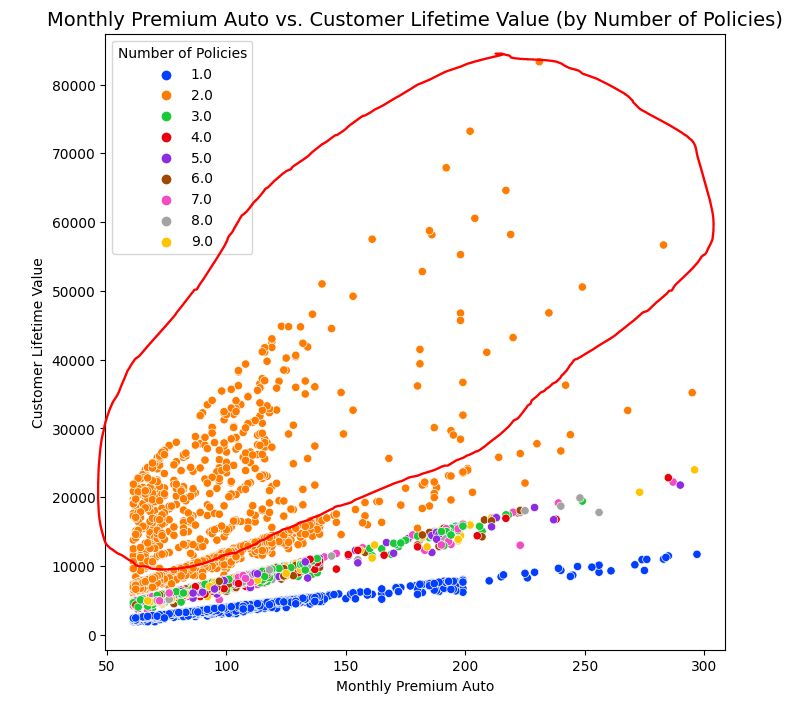

# Appendix A Saving The Model

## A.1. Saving The Model Using Pickle

In [58]:
# Menyimpan model mengggunakan pickle untuk dideploy
import pickle

tuned_estimator.fit(x,y) # model terbaik difit dengan keleruruhan data, karena semakain banyak data, seharusnya semakin baik model bekerja

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'Employment Status',
                                                   'Marital Status']),
                                                 ('coverage_ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                           'mapping': {None: 0,
                                                                                       'Basic': 1,
                                                                                       'Extended': 2,
                                                                                       'Premium': 3}}]),
                                                  ['Coverage']),
                                                 ('rot_ordinal',
                                                  OrdinalEncoder(mapping=[...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.05,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=200, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=2020, ...))])

In [59]:
# Menyimpan model
pickle.dump(tuned_estimator, open("Customer Lifetime Value Estimator.sav", "wb"))

## A.2. Example of Model Deployment

In [60]:
clv_estimator = pickle.load(open("Customer Lifetime Value Estimator.sav", "rb")) # read the model

In [61]:
def vc_input():
    vc_dict = {"1" : "Four-Door Car",
               "2" : "Two-Door Car",
               "3" : "SUV",
               "4" : "Sports Car",
               "5" : "Luxury SUV",
               "6" : "Luxury Car"}
    
    print("Vehicle Class Option :")
    for i in vc_dict.keys():
        print(f"{i}. {vc_dict[i]}")
    vc = input("Choose Vehicle Class (1-6) : ")
    if str(vc) in vc_dict.keys():
        return vc_dict[vc]
    else:
        return vc_input()
    
def cov_input():
    cov_dict = {"1" : "Basic",
                "2" : "Extended",
                "3" : "Premium"}
    
    print("Coverage Option :")
    for i in cov_dict.keys():
        print(f"{i}. {cov_dict[i]}")
    cov = input("Choose Coverage (1-3) : ")
    if str(cov) in cov_dict.keys():
        return cov_dict[cov]
    else:
        return cov_input()    

def rot_input():
    rot_dict = {"1" : "Offer1",
                "2" : "Offer2",
                "3" : "Offer3",
                "4" : "Offer4"}
    
    print("Renew Offer Type Option :")
    for i in rot_dict.keys():
        print(f"{i}. {rot_dict[i]}")    
    rot = input("Choose Renew Offer Type (1-4) : ")
    if str(rot) in rot_dict.keys():
        return rot_dict[rot]
    else:
        return rot_input()

def emp_input():
    emp_dict = {"1" : "Employed",
                "2" : "Unemployed",
                "3" : "Medical Leave",
                "4" : "Disabled",
                "5" : "Retired"}
    
    print("Employment Status Option :")
    for i in emp_dict.keys():
        print(f"{i}. {emp_dict[i]}")    
    emp = input("Choose Employment Status (1-5) : ")
    if str(emp) in emp_dict.keys():
        return emp_dict[emp]
    else:
        return emp_input()
    
def mar_input():
    mar_dict = {"1" : "Single",
                "2" : "Married",
                "3" : "Divorced"}
    
    print("Marital Status Option :")
    for i in mar_dict.keys():
        print(f"{i}. {mar_dict[i]}")
    mar = input("Choose Marital Status (1-3) : ")
    if str(mar) in mar_dict.keys():
        return mar_dict[mar]
    else:
        return mar_input()  
    
def edu_input():
    edu_dict = {"1" : "High School or Below",
                "2" : "College",
                "3" : "Bachelor",
                "4" : "Master",
                "5" : "Doctor"}
    
    print("Education Option :")
    for i in edu_dict.keys():
        print(f"{i}. {edu_dict[i]}")    
    edu = input("Choose Education (1-5) : ")
    if str(edu) in edu_dict.keys():
        return edu_dict[edu]
    else:
        return edu_input()
    
def nop_input():
    nop = float(input("Choose Number of Policies (integer, 1-9):"))
    
    if nop not in range(1,10):
        return nop_input()
    else:
        return nop
    
def mpa_input():
    mpa = float(input("Choose Monthly Premium Auto (61-297):"))
    
    if mpa >= 61 and mpa <= 297:
        return mpa
    else:
        return mpa_input()

def tca_input():
    tca = float(input("Choose Total Claim Amount (0.423310-2759.794354):"))
    
    if tca >= 0.423310 and tca <= 2759.794354:
        return tca
    else:
        return tca_input()
    
def inc_input():
    inc = float(input("Choose Income (0-99934):"))
    
    if inc >= 0 and inc <= 99934:
        return inc
    else:
        return inc_input()    

In [62]:
def clv_check(name):
    customer =  pd.DataFrame({"Vehicle Class" : vc_input(),
                              "Coverage" : cov_input(),
                              "Renew Offer Type" : rot_input(),
                              "Employment Status" : emp_input(),
                              "Marital Status" : mar_input(),
                              "Education" : edu_input(),
                              "Number of Policies" : nop_input(),
                              "Monthly Premium Auto" : mpa_input(),
                              "Total Claim Amount" : tca_input(),
                              "Income" : inc_input()}, index = [name])
    
    print(f"CLV Prediction for {name} is {list(clv_estimator.predict(customer))[0]} Dollar")
    
# clv_check("agus")